In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline 

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgoyZkf0D9mU_ocCikMa3Gr1f9WOCwi0bW8fpiYh0dat-ct9Fh3_T8


Load datasets

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/EndSARS.csv', encoding='utf-8')


In [ ]:
df.info()

In [ ]:
#remove pattern in the dataset
def remove_pattern(text):
  text = re.findall(pattern, df)
  for word in text:
    df = re.sub(word, "", df)
  
  return df
  df

In [ ]:
#create clean function
def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'$', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'0-9[A-Za-z]+', '', text)
  text = text.lower()
 


  return text
  
df['tweets'] = df['tweets'].apply(cleantxt)

df.head()

In [ ]:
df['clean_text'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

In [ ]:
#remove stop words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

In [ ]:
#tokenization
tokenized = df['clean_text'].apply(lambda x: x.split())
tokenized.head()

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized = tokenized.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized.head()

In [ ]:
df['clean_text'] = tokenized
df.head()

In [ ]:
df['clean_text'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

In [ ]:
#create a function to get subjectivity

from textblob import TextBlob

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


#create a function to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['subjectivity'] = df['tweets'].apply(getsubjectivity)
df['polarity'] = df['tweets'].apply(getpolarity)


#show new dataframe
df

,Unnamed: 0,tweets,clean_text,subjectivity,polarity
0,0,: young people should run for leadership posit...,young people should run for leadership posit...,0.472727,0.163636
1,1,: young people should run for leadership posit...,young people should run for leadership posit...,0.472727,0.163636
2,2,2023 presidency: who does the cap fit?the pro...,presidency who does the cap fit the pro...,0.100000,0.000000
3,3,: 🚨nottooyoungtorun🚨📢dyk that 35 million peopl...,nottooyoungtorun dyk that million peopl...,0.000000,0.000000
4,4,: 🚨nottooyoungtorun🚨📢dyk that 35 million peopl...,nottooyoungtorun dyk that million peopl...,0.000000,0.000000
5,5,: young people should run for leadership posit...,young people should run for leadership posit...,0.472727,0.163636
6,6,: young people should run for leadership posit...,young people should run for leadership posit...,0.472727,0.163636
7,7,: 2023 presidency: who does the cap fit?the d...,presidency who does the cap fit the d...,0.800000,0.000000
8,8,: 2023 presidency: who does the cap fit?the d...,presidency who does the cap fit the d...,0.800000,0.000000
9,9,: young people should run for leadership posit...,young people should run for leadership posit...,0.472727,0.163636


In [ ]:
#sentiment text function
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
#add sentiment column to dataframe
df['sentiment'] = df['polarity'].apply(getSentiment)
df[200:500]

,Unnamed: 0,tweets,clean_text,subjectivity,polarity,sentiment


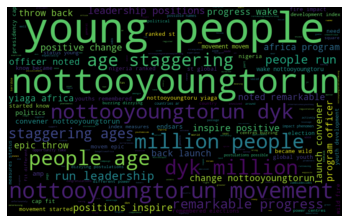

In [ ]:
#Visualization and exploration of dataset
allWords = ' '.join( [sentence for sentence in df['clean_text']] )

from wordcloud import WordCloud
wordCloud = WordCloud(width = 800, height = 500, random_state=42, max_font_size=100).generate(allWords)

#plot wordcloud
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

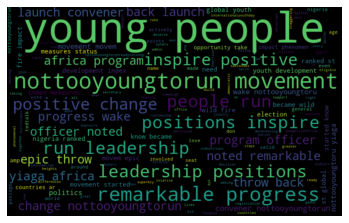

In [ ]:
#positive words visualization
allwords = " ".join([sentence for sentence in df['clean_text'][df['polarity'] > 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)


#wordcloud

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

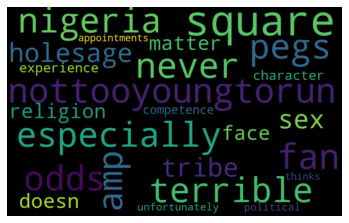

In [ ]:
#positive words visualization
allwords = " ".join([sentence for sentence in df['clean_text'][df['polarity'] < 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)


#wordcloud

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

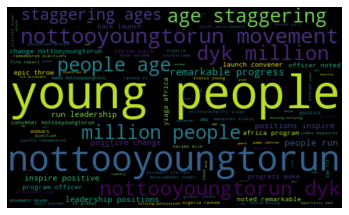

In [ ]:
#plot wordcloud 
allWords = ' '.join( [twts for twts in df['clean_text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state=23, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

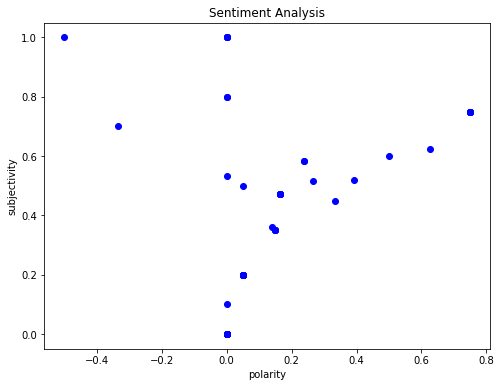

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

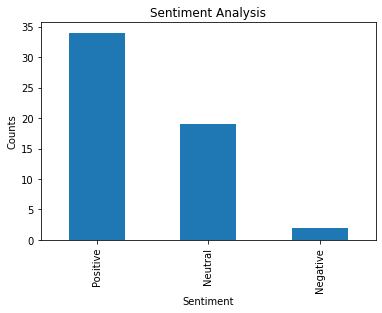

In [ ]:
#plot and visualize counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#creating a label for the tweets
def createlabel(score):
  if score < 0:
    return -1
  elif score >0 and score < 1:
    return 1
  else:
    return 0


#add label top dataframe
df['label'] = df['polarity'].apply(createlabel)
df[200:215]

,Unnamed: 0,tweets,clean_text,subjectivity,polarity,sentiment,label


In [ ]:
#input split and feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vect.fit_transform(df['clean_text'])

In [ ]:
# bow[0].toarray()

In [ ]:
bow

<55x87 sparse matrix of type '<class 'numpy.int64'>'
	with 443 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.30) 

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(38, 87) (38,) (17, 87) (17,)


In [ ]:
#model training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# model training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# testing
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.8235294117647058

In [ ]:
# use probabilty to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

#f1_score(y_test, pred)
accuracy_score(y_test, pred)

0.11764705882352941

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

BNmodel = BernoulliNB(alpha = 2)
SVCmodel = LinearSVC()
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)

In [ ]:
# model training BNB
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
# testing BNB
model.fit(x_test, y_test)
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.9411764705882353

In [ ]:
# model training LSVC
model2 = LinearSVC()
model2.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
# testing LSVC
model2.fit(x_test, y_test)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)

1.0

In [ ]:
pred_prob[0]

array([0.006165  , 0.02745697, 0.96637803])

In [ ]:
x_train = train['clean_text']
x_test = test['clean_text']

NameError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vector = TfidfVectorizer(use_idf=True)

In [ ]:
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score